In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import os
import pandas as pd
from matplotlib.ticker import MaxNLocator
import random
from operator import truediv

In [4]:
def makeplot_bar(experiments, planner, ttl):
    if plt_cfg["qt"] == 1:
        N = len(experiments)
        x = np.linspace(1, N, N, endpoint=True)
        plt.figure(ttl)
        plt.xlabel("Test run")
        if "dur" in ttl:
            plt.ylabel("Execution Time in [s]")
        else:
            plt.ylabel("Path Length in [m]")

        plt.bar(x, experiments, color=planner_stl[planner])
        plt.axhline(y=np.mean(experiments), color=planner_stl[planner], linewidth=2)
    else:
        # plt.title(ttl)
        data_dur = {}
        data_len = {}
        for key in experiments:
            # print(key)
            if "dur" in key:
                data_dur[key] = experiments[key]
            elif "len" in key:
                data_len[key] = experiments[key]

        fig, ax = plt.subplots()
        ax.set_title(ttl)
        # print(mean_dur)
        bar_plot(ax, data_dur, total_width=0.8, single_width=0.9)
        fig, ax = plt.subplots()
        ax.set_title(ttl)
        bar_plot(ax, data_len, total_width=0.8, single_width=0.9)
    plt.savefig("quanti/" + ttl + ".png", bbox_inches="tight")


def makeplot_line(arr, planner, ttl):
    N = len(arr)
    x = np.linspace(1, N, N, endpoint=True)

    plt.figure(ttl)
    plt.plot(
        x,
        arr,
        "o:",
        color=planner_stl[planner],
        label=planner + ": t_av = " + str(round(np.mean(arr), 2)),
    )

    # plt.ylim((0.7,0.9))
    plt.xlabel("run")
    plt.ylabel("execution time in [s]")
    plt.legend()
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, ns=""):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    # print(colors)
    # Number of bars per group
    n_bars = len(data)
    print(data)
    if n_bars > 0:
        # The width of a single bar
        # print(data)
        bar_width = total_width / n_bars

        # List containing handles for the drawn bars, used for the legend
        bars = []

        # Iterate over all data
        for i, (name, values) in enumerate(data.items()):
            # The offset in x direction of that bar
            if "kuka" in ns:
                x_offset = 4 + (i - n_bars / 2) * bar_width + bar_width / 2
            else:
                x_offset = 1 + (i - n_bars / 2) * bar_width + bar_width / 2

            planner = ""

            # Draw a bar for every value of that type
            for x, y in enumerate(values):
            #     # print(name)
            #     if "DRL" in name and not "JV" in name:
            #         planner = "DRL"
            #     elif "JV" in name:
            #         planner = "DRL-JV"
            #     elif "NC-RRT" in name:
            #         planner = "NC-RRT"
            #     elif "RRT" in name:
            #         planner = "RRT"

            #     # planner = name
            #     if planner == "":
            #         clr = colors[i % len(colors)]
            #     else:
            #         clr = planner_stl[planner]
                clr = planner_stl[name]

                bar = ax.bar(
                    x + x_offset,
                    y,
                    width=bar_width * single_width,
                    color=clr,
                )

            # Add a handle to the last drawn bar, which we'll need for the legend
            bars.append(bar[0])

        # Draw legend if we need
        if legend:
            ax.legend(bars, data.keys(), loc=0)
        for bars in ax.containers:
            # print(type(bars[0]),bars)
            # b = round(bars,1)
            ax.bar_label(bars, fmt="%.2f", fontweight="bold")
    else:
        print("No data to plot: ", data)


In [5]:
def bar_av(experiments, ttl, plnr):

    planner = plnr.split(",")

    data_dur = {}
    mean_dur = {}
    rel_dur = {}

    data_len = {}
    mean_len = {}
    rel_len = {}

    data_vel = {}
    mean_vel = {}
    rel_vel = {}

    data_smooth = {}
    mean_smooth = {}
    rel_smooth = {}

    # format dict according bar function
    for exp in experiments:
        for key in exp:
            if "dur" in key:
                data_dur[key] = exp[key]
                for p in planner:
                    if "_" + p in key:
                        if p in mean_dur:
                            mean_dur[p].append(np.mean(exp[key]))
                        else:
                            # if 'NC-RRT' in p:
                            #     mean_dur[p].append(np.mean(exp[key])+0.2)
                            mean_dur[p] = [np.mean(exp[key])]
            elif "len" in key:
                data_len[key] = exp[key]
                for p in planner:
                    if "_" + p in key:
                        if p in mean_len:
                            mean_len[p].append(np.mean(exp[key]))
                        else:
                            mean_len[p] = [np.mean(exp[key])]
            elif "eev" in key:
                data_vel[key] = exp[key]
                for p in planner:
                    if "_" + p in key:
                        if p in mean_vel:
                            mean_vel[p].append(np.mean(exp[key]))
                        else:
                            mean_vel[p] = [np.mean(exp[key])]
            elif "smooth" in key:
                data_smooth[key] = exp[key]
                for p in planner:
                    if "_" + p in key:
                        if p in mean_smooth:
                            mean_smooth[p].append(np.mean(exp[key]))
                        else:
                            mean_smooth[p] = [np.mean(exp[key])]

    # bar_3d(data_len)

    for p in mean_dur:
        if not "DRL" in p:
            # diif_dur = [element1 - element2 for (element1, element2) in zip(mean_dur["DRL"], mean_dur[p])]
            # diif_len = [element1 - element2 for (element1, element2) in zip(mean_len["DRL"], mean_len[p])]
            # diif_vel = [element1 - element2 for (element1, element2) in zip(mean_vel["DRL"], mean_vel[p])]

            # rel_len[p] = list(map(truediv, diif_dur, mean_len["DRL"]))
            # rel_dur[p] = list(map(truediv, diif_len, mean_dur["DRL"]))
            # rel_vel[p] = list(map(truediv, diif_vel, mean_vel["DRL"]))

            rel_len[p] = list(map(truediv, mean_len[p], mean_len["DRL"]))
            rel_dur[p] = list(map(truediv, mean_dur[p], mean_dur["DRL"]))
            rel_vel[p] = list(map(truediv, mean_vel[p], mean_vel["DRL"]))

    # print(mean_len)
    # print(ttl)
    # print('dur',mean_dur)
    fig, ax = plt.subplots()
    # ax.set_title("dur")
    bar_plot(ax, mean_dur, total_width=0.7, single_width=0.8, ns=ttl)
    plt.xlabel("Experiment")
    plt.ylabel("Average Execution time in [s]", fontweight="bold")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig("quanti/" + ttl + "_dur.png", bbox_inches="tight")

    # rel - enable for relative comparison
    # fig, ax = plt.subplots()
    # # ax.set_title("dur")
    # bar_plot(ax, rel_dur, total_width=0.7, single_width=0.8, ns=ttl)
    # plt.xlabel("Experiment")
    # plt.ylabel("Rel Execution time", fontweight="bold")
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # plt.savefig("quanti/" + ttl + "_rel_dur.png", bbox_inches="tight")

    # print('len',mean_len)
    fig, ax = plt.subplots()
    # ax.set_title("len")
    bar_plot(ax, mean_len, total_width=0.7, single_width=0.8, ns=ttl)
    plt.xlabel("Experiment")
    plt.ylabel("Average path length in [m]", fontweight="bold")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig("quanti/" + ttl + "_len.png", bbox_inches="tight")

    # rel - enable for relative comparison
    # fig, ax = plt.subplots()
    # # ax.set_title("len")
    # bar_plot(ax, rel_len, total_width=0.7, single_width=0.8, ns=ttl)
    # plt.xlabel("Experiment")
    # plt.ylabel("Rel path length", fontweight="bold")
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # plt.savefig("quanti/" + ttl + "_rel_len.png", bbox_inches="tight")

    # print('vel',mean_vel)
    fig, ax = plt.subplots()
    # ax.set_title("len")
    bar_plot(ax, mean_vel, total_width=0.7, single_width=0.8, ns=ttl)
    plt.xlabel("Experiment")
    plt.ylabel("Average velocity in [m/s]", fontweight="bold")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig("quanti/" + ttl + "_vel.png", bbox_inches="tight")

    # rel - enable for relative comparison
    # fig, ax = plt.subplots()
    # # ax.set_title("len")
    # bar_plot(ax, rel_vel, total_width=0.7, single_width=0.8, ns=ttl)
    # plt.xlabel("Experiment")
    # plt.ylabel("Rel velocity", fontweight="bold")
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # plt.savefig("quanti/" + ttl + "_rel_vel.png", bbox_inches="tight")
    # # return

    fig, ax = plt.subplots()
    # ax.set_title("dur")
    bar_plot(ax, mean_smooth, total_width=0.7, single_width=0.8, ns=ttl)
    plt.xlabel("Experiment")
    plt.ylabel("Average Smoothness", fontweight="bold")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig("quanti/" + ttl + "_smooth.png", bbox_inches="tight")

In [6]:
def bar_3d(experiments):
    # Fixing random state for reproducibility
    planner = plt_cfg["planner"].split(',')
    data = {}
    for key in experiments:
        print(key)
    #     for p in planner:
    #         if 
    #         data[key] = 
    np.random.seed(19680801)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    colors = ['r', 'g', 'b', 'y']
    yticks = [4, 3, 2, 1]
    for c, k in zip(colors, yticks):
        # Generate the random data for the y=k 'layer'.
        xs = np.arange(20)
        ys = np.random.rand(20)

        # You can provide either a single color or an array with the same length as
        # xs and ys. To demonstrate this, we color the first bar of each set cyan.
        cs = [c] * len(xs)
        cs[0] = 'c'

        # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
        # print(xs)
        # print(ys)
        ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # On the y axis let's only label the discrete values that we have data for.
    ax.set_yticks(yticks)


In [7]:

def makeplot_qual(eval_path, robot):

    experiments = {}
    if plt_cfg["ql"] == 2:
        global ax
        plt.figure(robot)
        ax = plt.axes(projection="3d")
    # ax = plt.axes(projection="3d")
    for p in os.listdir(eval_path):
        filepath = eval_path + p
        planner = p.replace('.csv','')
        # print(p, os.path.isdir(eval_path+'/'+p))
        title = robot + "_" + planner
        if planner in plt_cfg["planner"]:
            if plt_cfg["ql"] == 1:
                plt.figure(title)
            # create class obj
            quali = qual(filepath, planner, True)
            # call plot func
            evals = quali.plot_trj()
            dist = evals["tr_len_" + planner]
            dur = evals["runtime_" + planner]
            ev = evals["eev_" + planner]
            smooth = evals["smoothness" + planner]
            experiments[title + ": " + "tr_len"] = dist
            experiments[title + ": " + "dur"] = dur
            experiments[title + ": " + "eev"] = ev
            experiments[title + ": " + "smooth"] = smooth
            if plt_cfg["ql"] == 1:
                plt.legend()
                plt.savefig("quali/" + title + ".png", bbox_inches="tight")
            elif plt_cfg["ql"] == 2:
                plt.legend()
                plt.savefig("quali/" + robot + ".png", bbox_inches="tight")
            # makeplot_line(dur, planner, "duration")
            # makeplot_line(dist, planner, "tr_len")

            if plt_cfg["qt"] == 1:
                makeplot_bar(dur, planner, "duration_" + title)
                makeplot_bar(dist, planner, "path length_" + title)

    # print(bar_data)
    if plt_cfg["qt"] == 2:
        makeplot_bar(experiments, "", robot)
    

    return experiments

['[0.04489337 0.47745964 0.33210745]' '[0.04619811 0.46710083 0.3323617 ]'
 '[0.04976806 0.45499384 0.33548141]' ...
 '[0.37099659 0.48456293 0.29120594]' '[0.37127808 0.4875311  0.29326528]'
 '[0.37137833 0.49038959 0.2931481 ]']
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]
[ 1  1  1 ... 30 30 30]


KeyError: 'tr_len_DRL-IK'

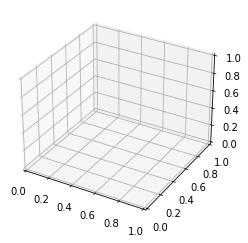

In [17]:
if __name__ == "__main__":
    experiments = {}
    planner_stl = {}

    planner_stl["DRL"] = "tab:blue"
    planner_stl["DRL-JV"] = "tab:green"
    planner_stl["RRT"] = "tab:orange"
    planner_stl["NC-RRT"] = "tab:purple"
    planner_stl["RRTs"] = "tab:red"
    planner_stl["DRL-AmirV9"] = "tab:gray"

    plt_cfg = {}
    plt_cfg["ql"] = 2
    plt_cfg["qt"] = 0
    # plt_cfg["planner"] = "DRL,DRL-JV,RRT,NC-RRT,DRL-AmirV9"
    # plt_cfg["planner"] = "NC-RRT,DRL,DRL-AmirV9"
    plt_cfg["planner"] = "DRL-IK,DRL-JV"

    # # Ur 5 ----------------------------------------------------------
    # ur5_1 = makeplot_qual("../ur5/trajectory/testcase1/", "ur5_1")
    # ur5_2 = makeplot_qual("../ur5/trajectory/testcase2/", "ur5_2")
    # ur5_3 = makeplot_qual("../ur5/trajectory/testcase3/", "ur5_3")

    ur5_1 = makeplot_qual("experiments/table_exp1/", "ur5_new")


    # # Kuka ----------------------------------------------------------
    # plt_cfg["planner"] = "DRL,RRT,NC-RRT"
    # kuka_1 = makeplot_qual("../kuka/trajectory/lowerleft/", "kuka_1")
    # kuka_2 = makeplot_qual("../kuka/trajectory/lowerright/", "kuka_2")
    # kuka_3 = makeplot_qual("../kuka/trajectory/upperleft/", "kuka_3")
    # kuka_4 = makeplot_qual("../kuka/trajectory/upperright/", "kuka_4")

    # # average bar plots ---------------------------------------------
    # bar_av([ur5_1, ur5_2, ur5_3], "ur5", "DRL,RRT,NC-RRT,DRL-JV")
    # bar_av([ur5_1], "ur5","DRL,NC-RRT,DRL-JV,DRL-AmirV9")
    # bar_av([ur5_1], "ur5", "DRL,DRL-AmirV9")
    # bar_av([kuka_1, kuka_2, kuka_3, kuka_4], "kuka", "DRL,RRT,NC-RRT")

    # 3d bar plots --------------------------------------------------
    # bar_3d() 
    plt.show()

['[0.04489337 0.47745964 0.33210745]' '[0.04619811 0.46710083 0.3323617 ]'
 '[0.04976806 0.45499384 0.33548141]' ...
 '[0.37099659 0.48456293 0.29120594]' '[0.37127808 0.4875311  0.29326528]'
 '[0.37137833 0.49038959 0.2931481 ]']
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]),)
(array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77]),)
(array([ 78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),)
(array([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 

KeyError: 'tr_len_DRL-IK'

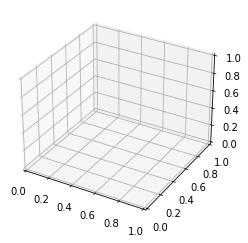

In [20]:

class qual:
    def __init__(self, pth, planner, single="True"):
        self.trj_pth = pth
        self.planner = planner
        self.evaluations = {}
        self.single = single


    def comp_smoothness(self,x,y,z):
        idx = 0
        smoothness = 0 
        while idx < len(x)-2:
            p1 = np.array([x[idx],y[idx],z[idx]])
            p2 = np.array([x[idx+1],y[idx+1],z[idx+1]])
            p3 = np.array([x[idx+2],y[idx+2],z[idx+2]])
            e1 = p2-p1
            e2 = p3-p2
            # np.linalg(e2-e1) 
            smoothness += np.linalg.norm(e2-e1) 
            idx += 1
        # print(self.planner, smoothness)
        return smoothness


    def plot_trj(self):
        data = pd.read_csv(self.trj_pth)
        # for col in data.columns:
        #     print(col)
        episodes = data['episode'].values
        comp_time = data['cpu_time'].values
        exec_time = data['sim_time'].values
        ee_pos = data['position_link_7_ur5_1'].values
        print(ee_pos)
        # max_el = self.count_elems(episodes)

        # count nr of occurences of each episode 
        unique, counts = np.unique(episodes, return_counts=True)
        # minimum ep occurance is max size for av arrays
        max_el = min(counts)

        x_av = np.zeros(max_el)
        y_av = np.zeros(max_el)
        z_av = np.zeros(max_el)

        n_episodes = episodes[len(episodes)-1]
        runtime = np.zeros(n_episodes)
        tr_len = np.zeros(n_episodes)
        ee_v = np.zeros(n_episodes)
        smoothness = np.zeros(n_episodes)

        # file_id = np.zeros(n_runs)
        # global ax
        if plt_cfg["ql"] == 2:
            global ax
        elif plt_cfg["ql"] == 1:
            ax = plt.axes(projection="3d")

        n = 0
        # print(arr)
        for run in unique:
            # txt_arr = np.loadtxt(self.trj_pth + f)
            print(np.where(episodes==run))
#             ts = txt_arr[:, 0:1].flatten()
#             # print(f)
#             duration = ts[len(ts) - 1] - ts[0]
#             runtime[n] = duration
#             # print(duration)

#             x = txt_arr[:, 1:2].flatten()
#             y = txt_arr[:, 2:3].flatten()
#             z = txt_arr[:, 3:4].flatten()
#             ev = txt_arr[:, 8:9].flatten()


#             xm = self.unify_trajs(x, max_el)
#             ym = self.unify_trajs(y, max_el)
#             zm = self.unify_trajs(z, max_el)

#             x_av = np.add(x_av, xm)
#             y_av = np.add(y_av, ym)
#             z_av = np.add(z_av, zm)

#             dist_array = (
#                 (x[:-1] - x[1:]) ** 2
#                 + (y[:-1] - y[1:]) ** 2
#                 + (z[:-1] - z[1:]) ** 2
#             )

#             cuur_smoothness = self.comp_smoothness(x,y,z)
#             curr_path_length = np.sum(np.sqrt(dist_array))
#             smoothness[n] = cuur_smoothness
#             tr_len[n] = curr_path_length
#             ee_v[n] = np.mean(ev)

#             # file_id[n] = int(f.replace('.txt',''))
#             if plt_cfg["ql"] > 0:
#                 ax.plot3D(x, y, z, color=planner_stl[self.planner], alpha=0.2)

#             n += 1

#         x_av /= n_runs
#         y_av /= n_runs
#         z_av /= n_runs

#         # get initial and goal position
#         sx = x_av[0]
#         sy = y_av[0]
#         sz = z_av[0]

#         ex = x_av[max_el - 1]
#         ey = y_av[max_el - 1]
#         ez = z_av[max_el - 1]

#         # plot avg trajectory
#         if plt_cfg["ql"] > 0:
#             ax.plot3D(
#                 x_av,
#                 y_av,
#                 z_av,
#                 label=self.planner,
#                 linewidth=3,
#                 color=planner_stl[self.planner],
#             )
#         # start and goal marker
#         if plt_cfg["ql"] > 0:
#             ax.scatter([sx], [sy], [sz], color="b", marker="o", s=150)
#             ax.scatter([ex], [ey], [ez], color="r", marker="*", s=150)


#             ax.set_xlabel("x in [m]")
#             ax.set_ylabel("y in [m]")
#             ax.set_zlabel("z in [m]")

#             # if 'kuka' in self.trj_pth:
#             #     ax.set_yticks([-0.5, 0])


#             # ax.set_xlim([-0.8,0.3])
#             # ax.set_ylim([-0.8,0.5])
#             # ax.set_zlim([0.4,1.1])

#             # ax.view_init(elev=10, azim=230)
#             ax.view_init(elev=10, azim=200)
#             ax.set_aspect('auto')

#         # path_length /= n_runs
#         # print(path_length,np.mean(tr_len))
#         self.evaluations["smoothness" + self.planner] = smoothness
#         self.evaluations["tr_len_" + self.planner] = tr_len
#         self.evaluations["eev_" + self.planner] = ee_v
#         self.evaluations["runtime_" + self.planner] = runtime
#         self.evaluations["tr_av_" + self.planner] = [x_av, y_av, z_av]
        return self.evaluations

    # returns the minimum amount of steps in each file
    def count_elems(self, arr):
        # each_episode = range(1,arr[len(arr)-1])
        # for e in each_episode:
        #     print(e, arr.count_nonzero(e))
        # return 0
        unique, counts = np.unique(arr, return_counts=True)
        print(unique,counts)

    # adjust dimensions of trj arrays
    def unify_trajs(self, trj, max_el):
        modified_trj = trj
        diff = len(trj) - max_el
        n = 0
        while n < diff:
            #    modified_trj.pop(n+1)

            if (len(modified_trj) <= n + 1):  # if diff is too big, then delete earlier values
                modified_trj = np.delete(modified_trj, random.randint(1, 3))
            else:
                modified_trj = np.delete(modified_trj, n + 1)
            n += 1

        return modified_trj





ur5_1 = makeplot_qual("experiments/table_exp1/", "ur5_new")










In [22]:
a = np.arange(10)

In [23]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
a[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])